#### General imports

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# import seaborn as sns

from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel

In [3]:
%store -r pokemon_df

In [4]:
pokemon_df

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False


In [5]:
pokemon_source = ColumnDataSource(pokemon_df)
output_notebook()

Loading BokehJS ...

#### Plot layout example

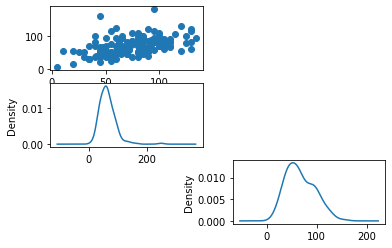

In [46]:
plt.subplot(3,2, 1)
plt.scatter('Attack', 'Defense', data = pokemon_df)

plt.subplot(3, 2, 3)
pokemon_df['HP'].plot(kind = 'density')

plt.subplot(3, 2, 6)
pokemon_df['Sp_Atk'].plot(kind = 'density')

plt.show()

#### Lmplot col,row scatter

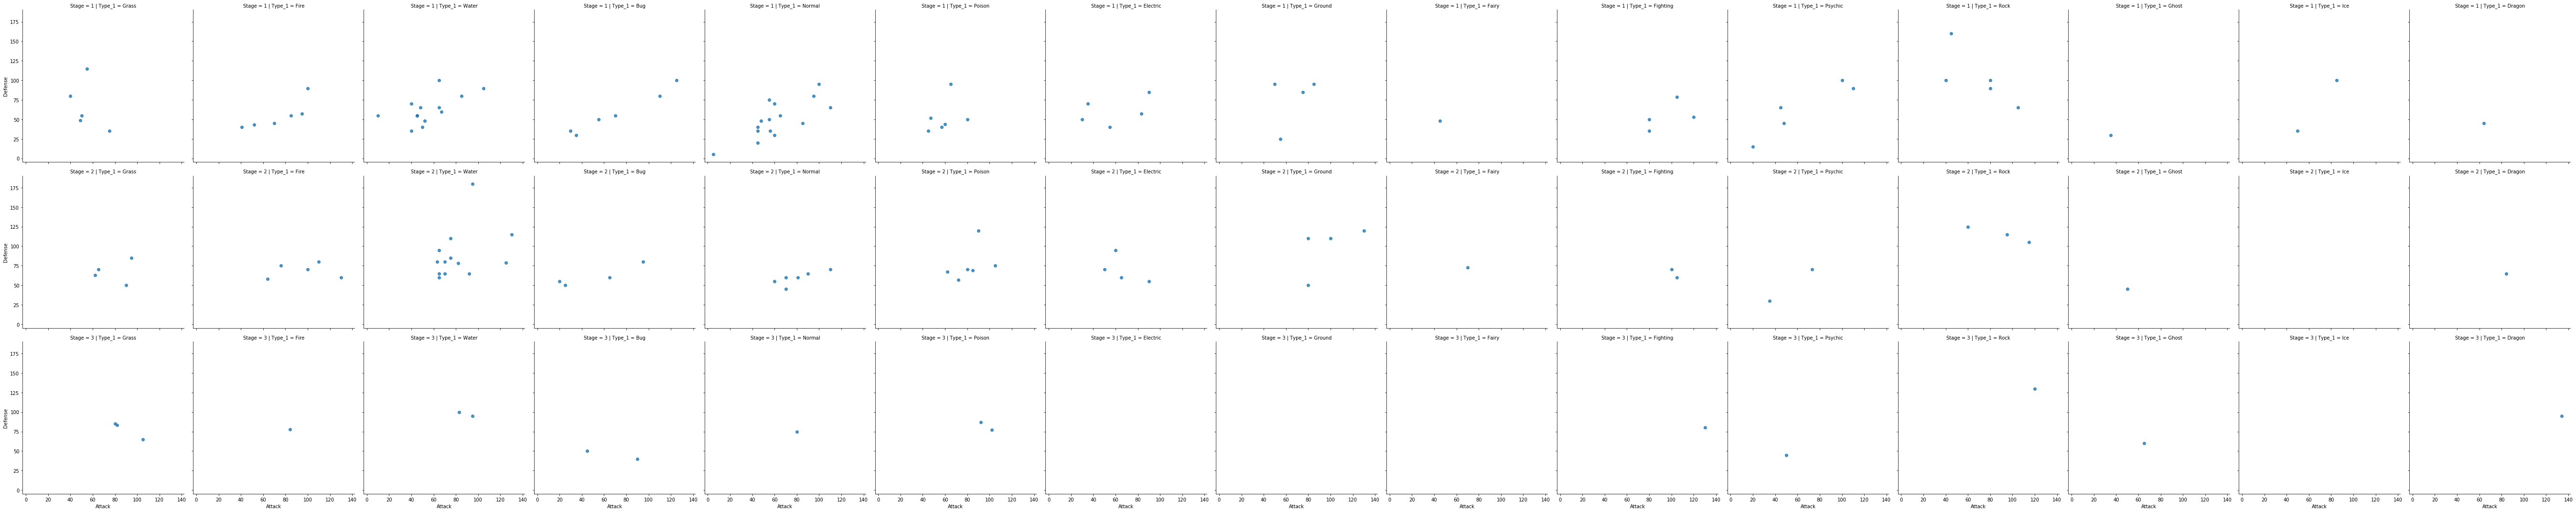

In [47]:
sns.lmplot(x='Attack', y='Defense', data=pokemon_df,
           fit_reg=False, 
           col = 'Type_1',
           row = 'Stage')
 


#### Excercise 9.1: Draw all distributions for all features with plot layout

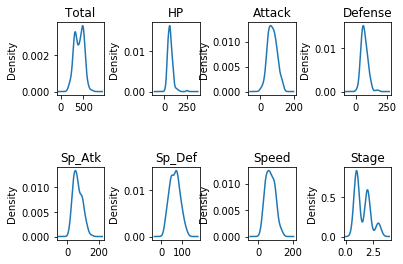

#### Excercise 20: Draw all HP distibutions for all pokemon Types 1 and 2

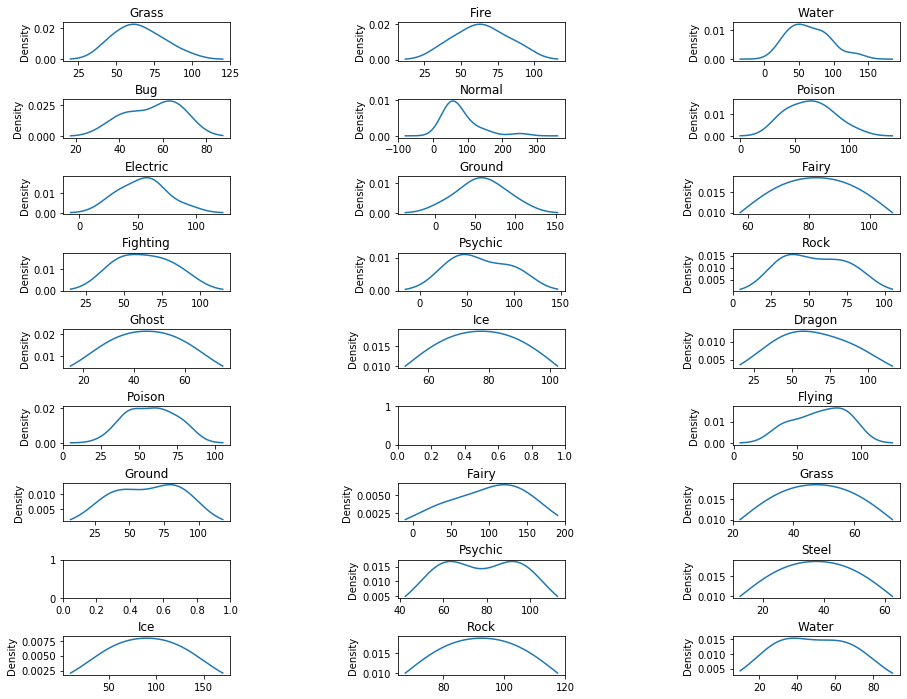

#### Excercise 21: Write result of the drawing to image in the following example

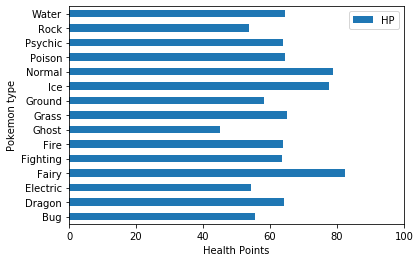

In [50]:
fig, ax = plt.subplots()
pokemon_type_1_stats_df.plot(kind='barh', 
                             y="HP", 
                             x="Type_1", 
                             ax=ax)
ax.set_xlim([0, 100])
ax.set_xlabel('Health Points')
ax.set_ylabel('Pokemon type')
plt.savefig("matplotlib_test.png")

![](matplotlib_test.png 'Pokemon stats')

#### Excercise 22: Draw all histograms for all parameters on one plot and save them to image [sns|plt]_histograms.png

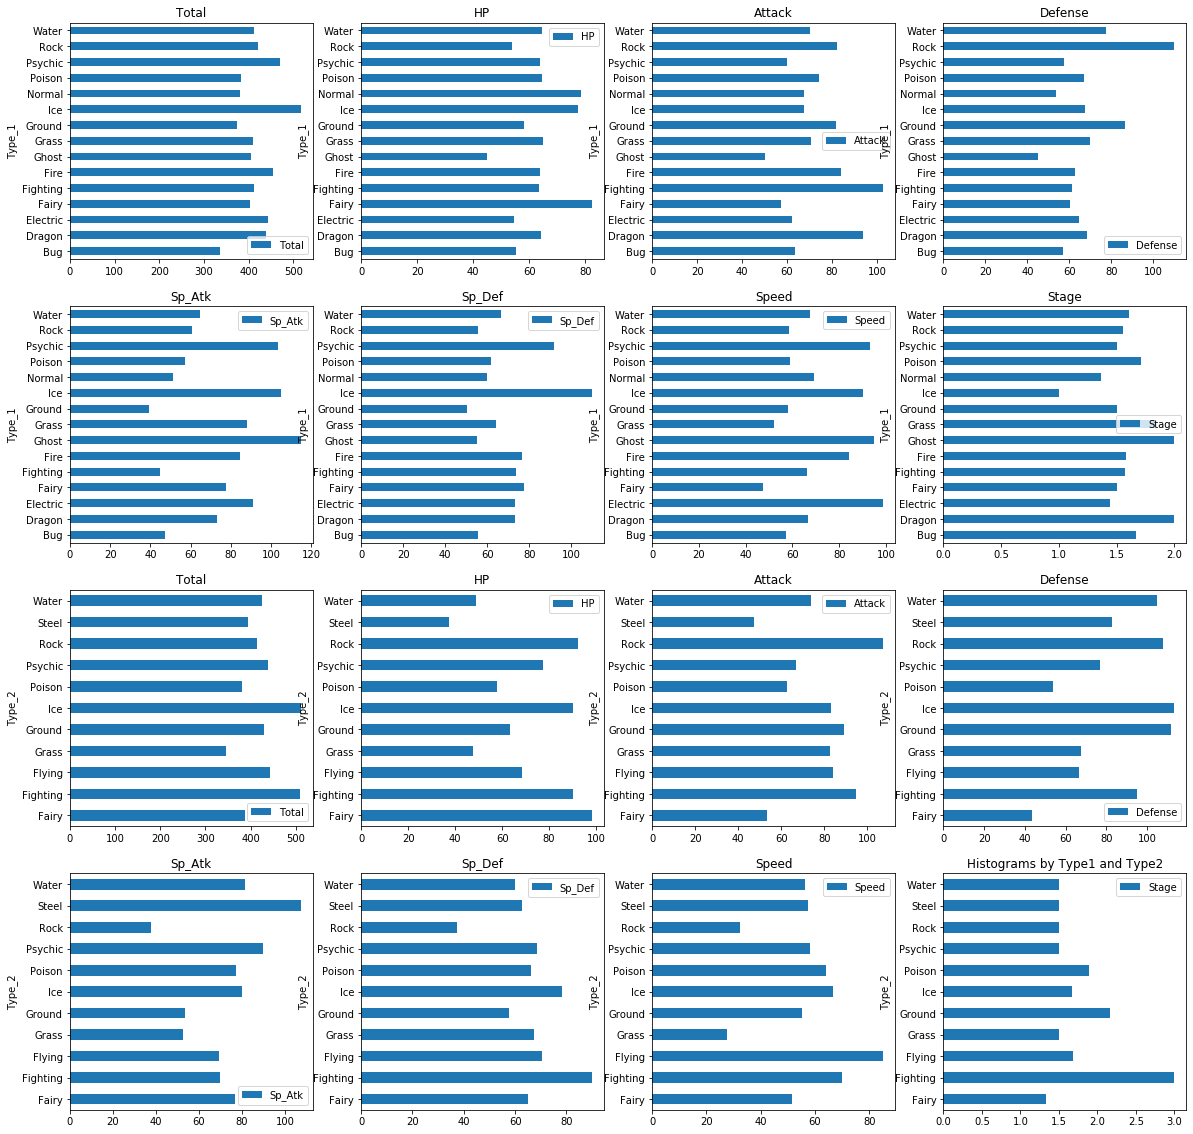

In [51]:
pokemon_type_1_stats_df = pokemon_df.groupby('Type_1').mean().reset_index()
pokemon_type_2_stats_df = pokemon_df.groupby('Type_2').mean().reset_index()
fig, axs = plt.subplots(4, 4, figsize=(20,20))
cnt = 0
for i, feature in enumerate(pokemon_df.columns.drop(['Name', 'Type_1', 'Type_2', 'Legendary'])):
    pokemon_type_1_stats_df.plot(kind='barh', y=feature, ax=axs[cnt//4][cnt%4], x='Type_1').set_title(feature)
    cnt+=1
for i, feature in enumerate(pokemon_df.columns.drop(['Name', 'Type_1', 'Type_2', 'Legendary'])):
    pokemon_type_2_stats_df.plot(kind='barh', y=feature, ax=axs[cnt//4][cnt%4], x='Type_2').set_title(feature)
    cnt+=1
plt.title('Histograms by Type1 and Type2')

plt.savefig("plt_histogram.png")

#### Excercise 23: Perform hoover image 

In [10]:
from bokeh.models import HoverTool
fig = figure()
fig.circle(x='HP', y='Attack',
         source=pokemon_source,
         size=10, color='green')


fig.title.text = 'Pokemon dataset'
fig.xaxis.axis_label = 'Health Points'
fig.yaxis.axis_label = 'Attack'

hover = HoverTool()
hover.tooltips=[
    ('Name', '@Name'),
     ('Type 1', '@Type_1'),
     ('Type 2', '@Type_2'),
    ('HP', '@HP'),
    ('Attack', '@Attack'),
]
fig.add_tools(hover)

show(fig)

#### Excercise 24: Create hoover image for Sp_Atk, Sp_Def pair and Stage, HP parameters

#### Excercise 25: Perform selection trick from lection

In [3]:
pokemon_source = ColumnDataSource(pokemon_df)

output_file('Bokeh_Pokemon.html',
            title='Pokemons')

select_tools = ['box_select', 
                'lasso_select', 
                'poly_select', 
                'tap', 
                'reset']

fig = figure(plot_height=400,
             plot_width=600,

             title='Pokemon bokeh',
             toolbar_location='below',
             tools=select_tools)

fig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

fig.square(x='HP',
           y='Attack',
           source=pokemon_source,
           color='royalblue',
           selection_color='deepskyblue',
           nonselection_color='lightgray',
           nonselection_alpha=0.3)


show(fig)

NameError: name 'ColumnDataSource' is not defined

In [ ]:
%%html
<iframe src="Bokeh_Pokemon.html" height=500 width=800></iframe>

#### Excercise 26: Create selection effect for Sp_Atk, Sp_Def pair and Stage, HP parameters

#### Excercise 27: Perform double selection trick from lection

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, NumeralTickFormatter
from bokeh.layouts import gridplot

output_file('Pokemon_double_selection.html',
            title='Pokemon_double_selection')

toolList = ['lasso_select', 'tap', 'reset', 'save']

pctFig = figure(title='Pokemon',
                plot_height=400, plot_width=400, tools=toolList,
                x_axis_label='Hp', y_axis_label='Defense')

pctFig.circle(x='HP', y='Attack', 
              source=pokemon_source, 
              size=12, 
              color='black')

pctFig.xaxis[0].formatter = NumeralTickFormatter(format='00.0%')
pctFig.yaxis[0].formatter = NumeralTickFormatter(format='00.0%')

totFig = figure(title='Pokemon',
                plot_height=400, plot_width=400, tools=toolList,
                x_axis_label='Sp_Atk', y_axis_label='Sp_Def')

totFig.square(x='Sp_Atk', 
              y='Sp_Def', 
              source=pokemon_source, 
              size=10,
             )

grid = gridplot([[pctFig, totFig]])

show(grid)